# <center>National Park Service About Endangered Species</center>

For this project, we will interpret data from the National Parks Service about endangered species in different parks.

We will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, we will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

After we perform your analysis, we will share your findings about the National Park Service.

### National Park Service

<img src="https://www.eenews.net/image_assets/2020/08/image_asset_90137.jpg" alt="NPS" style="zoom:67%;" />

National Park Service (NPS), agency of the U.S. Department of the Interior that manages and maintains several hundred national parks, monuments, historical sites, and other designated properties of the federal government. It was established in 1916 by an act of the U.S. Congress that was signed into law by U.S. Pres. Woodrow Wilson. The law stipulated that the new service was to “conserve the scenery and the natural and historic objects and the wild life therein and…leave them unimpaired for the enjoyment of future generations.”

An endangered species is a species that is very likely to become extinct in the near future, either worldwide or in a particular political jurisdiction. Endangered species may be at risk due to factors such as habitat loss, poaching and invasive species. The International Union for Conservation of Nature (IUCN) Red List lists the global conservation status of many species, and various other agencies assess the status of species within particular areas. Many nations have laws that protect conservation-reliant species which, for example, forbid hunting, restrict land development, or create protected areas. Some endangered species are the target of extensive conservation efforts such as captive breeding and habitat restoration.

### Conservation status

<img src="https://image.isu.pub/100707150116-3c2b387f38174169afc127af1a227616/jpg/page_1.jpg" alt="Endangered" style="zoom:40%" />

The conservation status of a species indicates the likelihood that it will become extinct. Many factors are considered when assessing the status of a species; e.g., such statistics as the number remaining, the overall increase or decrease in the population over time, breeding success rates, or known threats. The IUCN Red List of Threatened Species is the best-known worldwide conservation status listing and ranking system.

Over 50% of the world's species are estimated to be at risk of extinction. Internationally, 195 countries have signed an accord to create Biodiversity Action Plans that will protect endangered and other threatened species. In the United States, such plans are usually called Species Recovery Plans.

### About the data

We have been given two CSV files:

1. **species_info.csv** - contains data about different species and their conservation status

2. **observations.csv** - holds recorded sightings of different species at several national parks for the past 7 days.

**species_info.csv**:

- **category** - class of animal
- **scientific_name** - the scientific name of each species
- **common_name** - the common names of each species
- **conservation_status** - each species’ current conservation status

**observations.csv**:

- **scientific_name** - the scientific name of each species
- **park_name** - Park where species were found
- **observations** - the number of times each species was observed at park

**The Dataset:**

- Content by Codeacademy.com: [biodiversity](https://content.codecademy.com/PRO/paths/data-science/biodiversity-starter.zip)

## 1. Importing Python Modules

In [1]:
# Importing library necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset
df_ob = pd.read_csv('observations.csv')
df_species = pd.read_csv('species_info.csv')

# Success
print("Observations dataset has {} data points with {} variables each.".format(*df_ob.shape))
print("Species dataset has {} data points with {} variables each.".format(*df_species.shape))

Observations dataset has 23296 data points with 3 variables each.
Species dataset has 5824 data points with 4 variables each.


## 2. Inspecting Data

In [15]:
# Inspecting data
print(df_ob.columns)
print('---' * 25)
print(df_species.columns)
print('---' * 25)
print(df.dtypes)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')
---------------------------------------------------------------------------
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
---------------------------------------------------------------------------
scientific_name        object
park_name              object
observations            int64
category               object
common_names           object
conservation_status    object
dtype: object


In [3]:
# Merging both data
df = pd.merge(df_ob, df_species)
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN


In [4]:
# Checking null values
df.isnull().sum()

scientific_name            0
park_name                  0
observations               0
category                   0
common_names               0
conservation_status    24752
dtype: int64

The Null Values are for regular species (not endangered). Let's fix this.

In [5]:
df['conservation_status'].fillna('Regular', inplace=True)

In [6]:
df['conservation_status'].unique()

array(['Regular', 'Species of Concern', 'Threatened', 'Endangered',
       'In Recovery'], dtype=object)

## 3. Data Visualization

Let's conclude some initial facts, like the category column proportion.

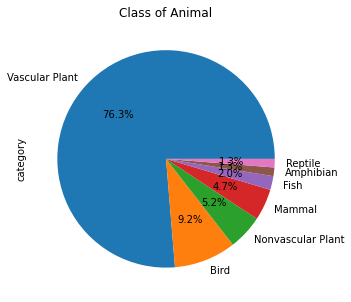

In [26]:
# Ploting category
plt.figure(figsize=(10,5))
df['category'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('Class of Animal')
plt.show()

The Vascular Plant represents 76.3% of dataset, followed by bird with 9.2%

ValueError: could not convert string to float: 'Regular'

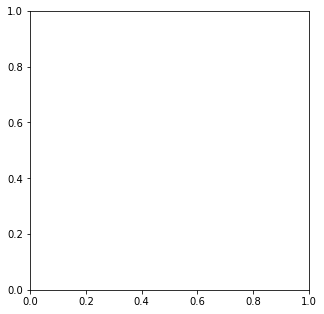

In [35]:
# Ploting conservation status
#CONTINUE